## The Sparks Foundation internship program
### Task 2 -  Supervised Machine Learning / Simple linear regression

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df_stscores = pd.read_csv("student_scores.csv")

In [94]:
df_stscores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [95]:
df_stscores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df_stscores.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [62]:
missing_data = df_stscores.isnull()
missing_data

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Data Exploration

In [7]:
df_stscores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df_stscores.shape

(25, 2)

In [63]:
df_stscores.dtypes

Hours     float64
Scores      int64
dtype: object

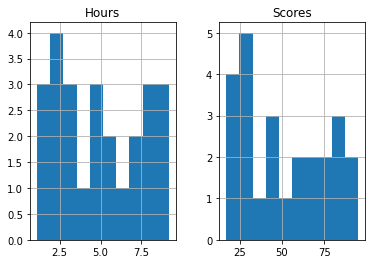

In [9]:
viz = df_stscores[['Hours','Scores']]
viz.hist()
plt.show()

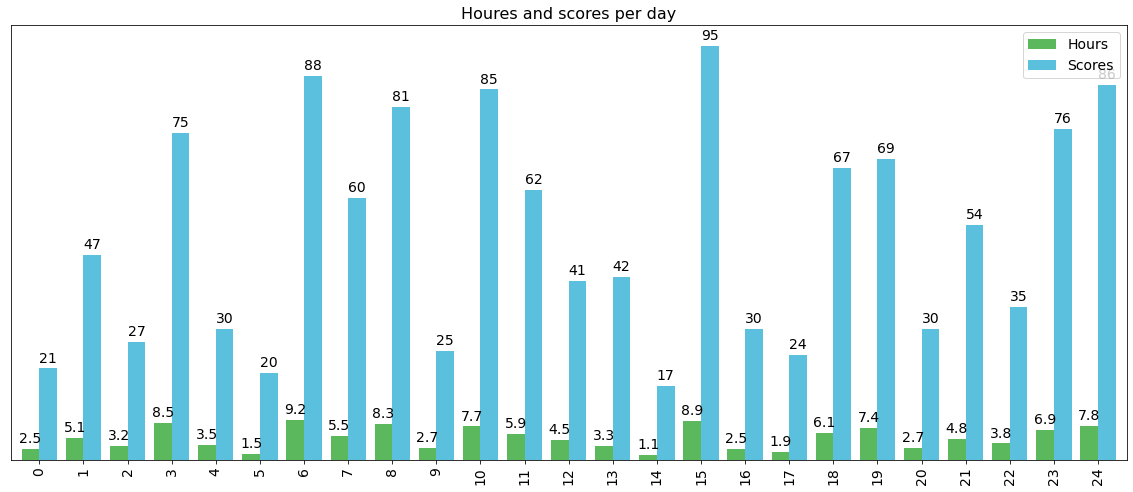

In [71]:
ax = df_stscores.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#5cb85c','#5bc0de','#d9534f'],
                width=0.8,
                fontsize=14)

ax.set_title('Houres and scores per day',fontsize=16)

ax.set_facecolor('white')

ax.legend(fontsize=14,facecolor = 'white') 

ax.get_yaxis().set_visible(False)


for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14)
plt.show()

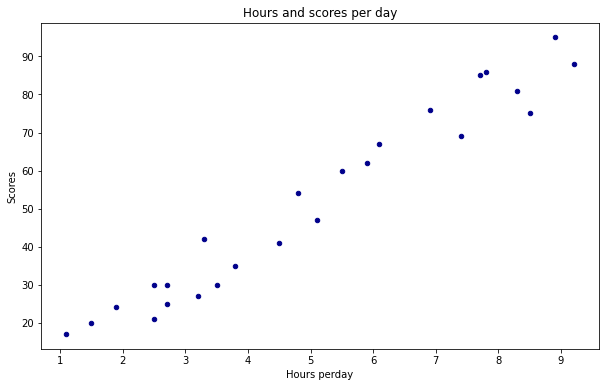

In [113]:
df_stscores.plot(kind='scatter', x='Hours', y='Scores', figsize=(10, 6), color='darkblue')
plt.title('Hours and scores per day')
plt.xlabel('Hours perday')
plt.ylabel('Scores')

plt.show()

In [114]:
#Creating train and test dataset

In [115]:
X = df_stscores.iloc[:,:-1].values   
y = df_stscores.iloc[:,-1].values

In [116]:
print(df_stscores)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


### train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

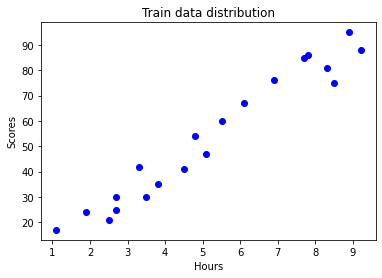

In [117]:
plt.scatter(X_train, y_train, color='blue')
plt.title("Train data distribution")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Simple Regression Model

### Modeling
#### Using sklearn package to model data.

In [30]:
#Train data distribution

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)

LinearRegression()

In [33]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434683


### Plot outputs

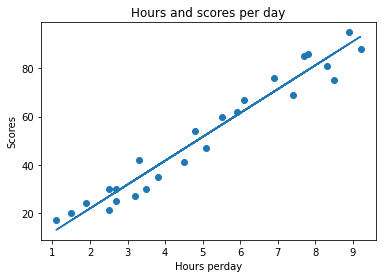

In [118]:
line = regr.coef_*X +regr.intercept_

plt.scatter(X,y)
plt.plot(X, line);
plt.title('Hours and scores per day')
plt.xlabel('Hours perday')
plt.ylabel('Scores')

plt.show()

In [119]:
print(X_test)
y_pred = regr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [120]:
df1 = pd.DataFrame({'predictions': y_pred, 'actual': y_test})
df1

,predictions,actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [137]:
hrs_predict= regr.predict([[9.25]])
print("If student study 9.25 hrs per day, he could get score", hrs_predict, ".")

If student study 9.25 hrs per day, he could get score [93.69173249] .


### Evaluation

In [138]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [139]:
print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

0.9482829156738147
4.183859899002975
21.5987693072174
0.9454906892105356
